# Atividade 2 - Visão Computacional

O entregável de toda esta atividade vai ser um código-fonte em *Python*. 

Encorajamos vocês a fazerem vídeos demonstrando o resultado e a postar (pode ser privadamente) no YouTube

Você pode entregar enviando o código para o Github e postando o vídeo *ou* mostrando ao vivo aos professores

**Não programe no Jupyter** - use um programa Python



Obs.: [Instale o GIT-FLS](../guides/git_lfs.md) para poder baixar este repositório.



Você deve ter uma folha com o padrão anexo. 
*Dica:* Se não tiver, é possível fazer também com um tablet ou *smartphone*
 
<img src="folha_atividade.png" width=300>

## Parte 1 - calibração

Ouça a explicação do professor sobre o modelo de câmera *pinhole*  e desenhe a medida $f$ que separa o plano focal da pupila da câmera

Detalhe como calculou $f$

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
import sys
import math
print ("OpenCV Version : %s " % cv2.__version__)

from ipywidgets import widgets, interact, interactive, FloatSlider, IntSlider

OpenCV Version : 4.1.1 


In [2]:
resposta_1 = cv2.imread("resposta_1.jpg")

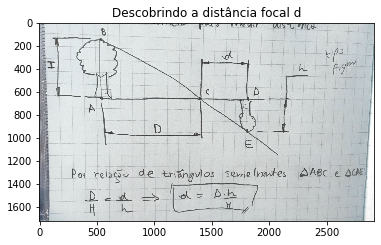

In [3]:
plt.title("Descobrindo a distância focal d")
plt.imshow(resposta_1, vmin=0, vmax=255);

In [4]:
#Calculando f (distância focal)
D = 24.5 #distância da tela ao papel, em centímetros
H = 13.8 #distância entre os círculos em centímetros
h = 9.63 #distância entre os círculos em pixels
f = D * h / H
print("f = {0} pixels".format(f) )

f = 17.096739130434784 pixels


## Parte 2

Modifique um dos exemplos `draw_circles_video.py` ou `videoplay.py` para passar a ler dados da webcam e identificar o círculo magenta e o círculo ciano, usando o `inRange`

Concluída

## Parte 3

Assumindo que a folha se mantém sempre paralela ao plano de imagem da câmera, imprima a distância entre a folha e sua câmera

## Parte 4

Trace uma linha entre os centros do círculo magenta e do círculo ciano.

Imprima na tela o ângulo entre esta linha e a horizontal

## Parte 5

Baseado nos círculos encontrados pela transformada de Hough, desenhe um círculo sobre o círculo ciano e outro sobre o círculo magenta.

Dica: Use a função `cv2.circle` e veja o exemplo [draw_circles_video.py](draw_circles_video.py).

**Desafio bônus**: ser capaz de eliminar circulos espúrios (aqueles que não são os da folha)

## Parte 6

Usando um detector de features `BRISK`, identifique o escrito *Insper* na folha.

clique para ver o [código](features.py)

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from math import pi
import matplotlib.cm as cm

In [8]:
insper_bgr = cv2.imread('nome_insper.png')
insper_gray = cv2.cvtColor(insper_bgr, cv2.COLOR_BGR2GRAY)

In [9]:
brisk = cv2.BRISK_create() # Nota: numa versão anterior era a BRISK
kpts = brisk.detect(insper_gray)
x = [k.pt[0] for k in kpts]
y = [k.pt[1] for k in kpts]
# s will correspond to the neighborhood area
s = [(k.size/2)**2 * pi for k in kpts]

Text(0.5, 1.0, 'BRISK')

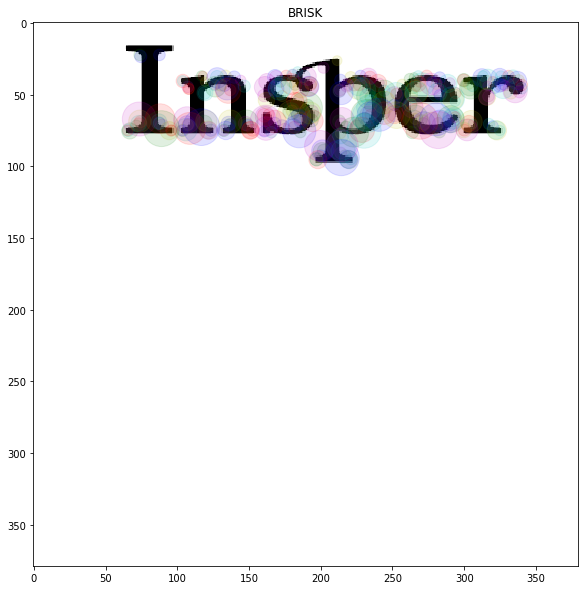

In [10]:
plt.figure(figsize=(20,10))
colors = list("bgrcmy")
cores_grafico = np.random.choice(colors, size=len(x), replace=True)
plt.scatter(x, y, s, c=cores_grafico, alpha=0.12)
plt.imshow(insper_gray, cmap=cm.gray)
plt.title('BRISK')

In [14]:
def find_homography_draw_box(kp1, kp2, img_cena):
    
    out = img_cena.copy()
    
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)


    # Tenta achar uma trasformacao composta de rotacao, translacao e escala que situe uma imagem na outra
    # Esta transformação é chamada de homografia 
    # Para saber mais veja 
    # https://docs.opencv.org/3.4/d9/dab/tutorial_homography.html
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()


    
    h,w = img_original.shape
    # Um retângulo com as dimensões da imagem original
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)

    # Transforma os pontos do retângulo para onde estao na imagem destino usando a homografia encontrada
    dst = cv2.perspectiveTransform(pts,M)


    # Desenha um contorno em vermelho ao redor de onde o objeto foi encontrado
    img2b = cv2.polylines(out,[np.int32(dst)],True,(255,255,0),5, cv2.LINE_AA)
    
    return img2b

In [17]:
# Número mínimo de pontos correspondentes
MIN_MATCH_COUNT = 10

cena_bgr = cv2.imread("folha_atividade.png") # Imagem do cenario
original_bgr = insper_bgr

# Versões RGB das imagens, para plot
original_rgb = cv2.cvtColor(original_bgr, cv2.COLOR_BGR2RGB)
cena_rgb = cv2.cvtColor(cena_bgr, cv2.COLOR_BGR2RGB)

In [18]:
# Versões grayscale para feature matching
img_original = cv2.cvtColor(original_bgr, cv2.COLOR_BGR2GRAY)
img_cena = cv2.cvtColor(cena_bgr, cv2.COLOR_BGR2GRAY)

framed = None

# Imagem de saída
out = cena_rgb.copy()


# Cria o detector BRISK
brisk = cv2.BRISK_create()

# Encontra os pontos únicos (keypoints) nas duas imagems
kp1, des1 = brisk.detectAndCompute(img_original ,None)
kp2, des2 = brisk.detectAndCompute(img_cena,None)

# Configura o algoritmo de casamento de features que vê *como* o objeto que deve ser encontrado aparece na imagem
bf = cv2.BFMatcher(cv2.NORM_HAMMING)


# Tenta fazer a melhor comparacao usando o algoritmo
matches = bf.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)


if len(good)>MIN_MATCH_COUNT:
    # Separa os bons matches na origem e no destino
    print("Matches found")    
    framed = find_homography_draw_box(kp1, kp2, cena_rgb)
else:
    print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))


Matches found


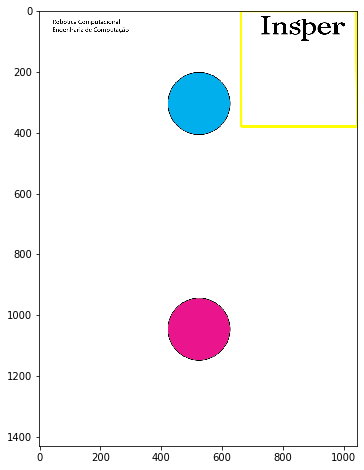

In [19]:
plt.figure(figsize=(10,8))
plt.imshow(framed)

In [20]:
#np.random.choice(matches,100)
img3 = cv2.drawMatches(original_rgb,kp1,cena_rgb,kp2, good,       None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

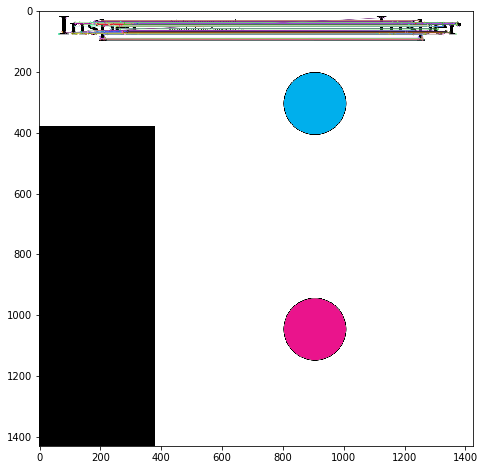

In [21]:
plt.figure(figsize=(13,8))
plt.imshow(img3)